<a href="https://colab.research.google.com/github/Tridung2k3/ThucHanhToanCC/blob/main/Th%E1%BB%B1c_H%C3%A0nh_%C4%90STT_Ch%C6%B0%C6%A1ng_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Giới thiệu một số ứng dụng của tích vector (dot product) ***

In [1]:
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample)

array([ 1,  5, 30])

1.1.Ứng dụng 1 – Nguyên lý tìm nốt nhạc trong chuỗi âm thanh (Audio search) 


In [2]:
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A), len(search_vector) # nghĩa là = (10, 3)

(10, 3)

In [8]:
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1): # so dong
 for j in range(len(search_vector)): # so cot
   B[i,j] = A[i+j] 

In [4]:
C = np.inner(B, search_vector)
for i in range(len(A)-len(search_vector)+1): # tìm vị trí của vector vừa tìm thấy
 if ( C[0,i] == np.inner(search_vector, search_vector) ):
  print (i, B[i])

6 [[ 0  1 -1]]


1.2.Ứng dụng 2 – Tạo ảnh mẫu và làm mờ ảnh 


In [ ]:
from PIL import Image

img = Image.open('C:/traidat.PNG')
img.height # xem chiều cao của ảnh
img.width # chiều rộng của ảnh
img.mode # xem kiểu ảnh. Thường là 'RGBA', với kiểu ảnh có chữ ‘P’ chúng ta phải thêm một lệnh xử lý như sau:
img = img.convert("RGB") # convert it to RGB (để chuyển về dạng RGB)
new_width = int(img.width / 2) # giảm ½ chiều rộng
new_height = int(img.height / 2) # giảm ½ chiều cao
new_img = img.resize((new_width, new_height),Image.ANTIALIAS)
new_img.save('C:/traidat_small.PNG')

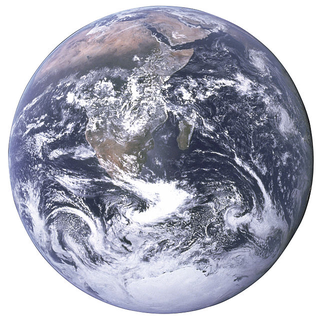

In [ ]:
from PIL import Image, ImageDraw
input_image = Image.open('C:/traidat.PNG')
input_pixels = input_image.load() # đọc các pixel(điểm ảnh). GV giải thích khái niệm pixel
box_kernel = [[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]] 
kernel = box_kernel
offset = len(kernel) // 2
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
for x in range(offset, input.width - offset):
  for y in range(offset, input_image.height - offset):
    acc = [0, 0, 0]
    for a in range(len(kernel)):
      for b in range(len(kernel)):
        xn = x + a - offset
        yn = y + b - offset
        pixel = input_pixels[xn, yn]
        acc[0] += pixel[0] * kernel[a][b]
        acc[1] += pixel[1] * kernel[a][b]
        acc[2] += pixel[2] * kernel[a][b]
    draw.point((x,y), (int(acc[0]), int(acc[1]), int(acc[2])))
output_image.save('C:/traidat_lammo.PNG')

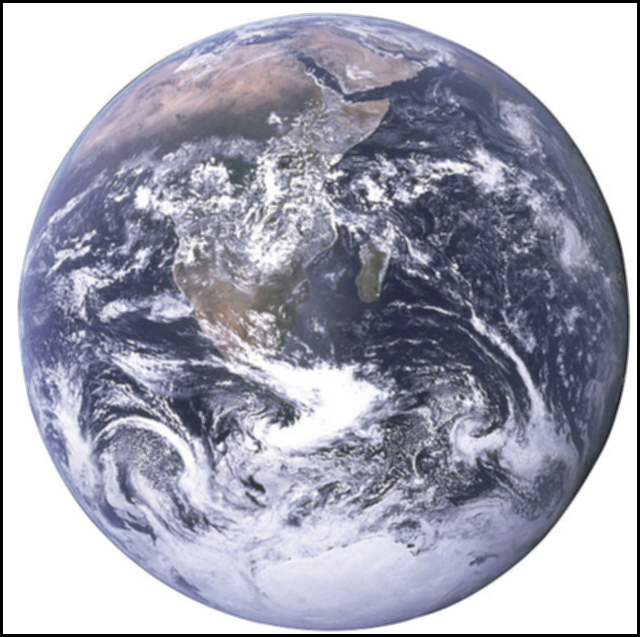

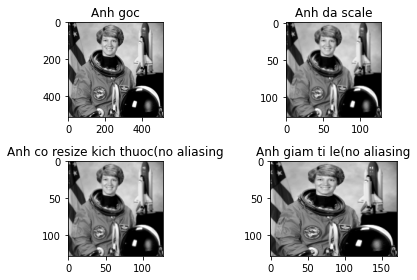

In [27]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 1.0 / 4.0)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))
image_downscaled = downscale_local_mean(image, (4, 3))

fix, axes = plt.subplots(nrows = 2, ncols = 2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray') # thể hiện màu xám
ax[0].set_title('Anh goc')

ax[1].imshow(image_rescaled, cmap='gray') # thể hiện màu xám
ax[1].set_title('Anh da scale')

ax[2].imshow(image_resized, cmap='gray') # thể hiện màu xám
ax[2].set_title('Anh co resize kich thuoc(no aliasing')

ax[3].imshow(image_downscaled, cmap='gray') # thể hiện màu xám
ax[3].set_title('Anh giam ti le(no aliasing')

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

# **2. Ứng dụng: Xếp hạng các trang web với trị riêng và vector riêng**

2.1.Đơn giản hóa thuật toán Pagerank 


In [28]:
import numpy as np
A = np.array([[0,0,1.0/2, 1.0/2],
 [1.0/3,0,0,0],
 [1.0/3,0,0,1.0/2],
 [1.0/3,1.0,1.0/2,0]])
x = np.array([1,1,1,1]) 

In [29]:
x = np.dot(A, x)
print (x)

[1.         0.33333333 0.83333333 1.83333333]


In [30]:
x = np.array([1.0, 1.0, 1.0, 1.0])
for i in range(10):
 x = np.dot(A, x)
 print (i+1, x)

1 [1.         0.33333333 0.83333333 1.83333333]
2 [1.33333333 0.33333333 1.25       1.08333333]
3 [1.16666667 0.44444444 0.98611111 1.40277778]
4 [1.19444444 0.38888889 1.09027778 1.32638889]
5 [1.20833333 0.39814815 1.06134259 1.33217593]
6 [1.19675926 0.40277778 1.06886574 1.33159722]
7 [1.20023148 0.39891975 1.06471836 1.3361304 ]
8 [1.20042438 0.40007716 1.06814236 1.3313561 ]
9 [1.19974923 0.40014146 1.06581951 1.3342898 ]
10 [1.20005466 0.39991641 1.06706131 1.33296762]


2.2. [Đọc thêm] Xử lý dangling node trong thuật toán Pagerank 


In [31]:
A = np.array([[0,0,1.0/2, 0.0],
 [1.0/3,0,0,0],
 [1.0/3,0,0,0.0],
 [1.0/3,1.0,1.0/2,0]])

In [32]:
for i in range(5):
 x = np.dot(A, x)
 print (i+1, x)

1 [0.53353066 0.40001822 0.40001822 1.33346528]
2 [0.20000911 0.17784355 0.17784355 0.77787088]
3 [0.08892178 0.0666697  0.0666697  0.33343503]
4 [0.03333485 0.02964059 0.02964059 0.12964515]
5 [0.0148203  0.01111162 0.01111162 0.05557251]


In [33]:
x = np.array([1.0, 1.0, 1.0, 1.0])
A = np.array([[0,0,1.0/2, 1/4.0],
 [1.0/3,0,0,1/4.0],
 [1.0/3,0,0,1/4.0],
 [1.0/3,1.0,1.0/2,1/4.0]])
for i in range(7):
 x = np.dot(A, x)
 print (i+1, x)

1 [0.75       0.58333333 0.58333333 2.08333333]
2 [0.8125     0.77083333 0.77083333 1.64583333]
3 [0.796875   0.68229167 0.68229167 1.83854167]
4 [0.80078125 0.72526042 0.72526042 1.74869792]
5 [0.79980469 0.70410156 0.70410156 1.79199219]
6 [0.80004883 0.71459961 0.71459961 1.77075195]
7 [0.79998779 0.70937093 0.70937093 1.78127035]


In [34]:
np.max(x) 

1.7812703450520826

2.3. [Đọc thêm] Xử lý nhánh web reducible 


In [35]:
A = np.array([[0.0, 0.0, 1/2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0/3, 0.0, 1/2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1/3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0/3,1/2.0,1/2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0 ,1/2.0, 0.0, 0.0, 0.0,1/2.0, 0.0,0.0],
 [0.0, 0.0, 0.0,0.0, 0.0, 0.0, 1.0,1/2.0],
 [0.0, 0.0, 0.0,1/2.0, 1.0, 0.0, 0.0, 1/2.0],
 [0.0, 0.0, 0.0,0.0, 0.0,1/2.0, 0.0, 0.0]])

In [36]:
N = 8
x = np.array([1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N])

In [37]:
for i in range(7):
 x = np.dot(A, x)
 print (i+1, x)

1 [0.0625     0.10416667 0.04166667 0.16666667 0.125      0.1875
 0.25       0.0625    ]
2 [0.02083333 0.04166667 0.02083333 0.09375    0.14583333 0.28125
 0.23958333 0.09375   ]
3 [0.01041667 0.01736111 0.00694444 0.03819444 0.16145833 0.28645833
 0.23958333 0.140625  ]
4 [0.00347222 0.00694444 0.00347222 0.015625   0.15190972 0.30989583
 0.25086806 0.14322917]
5 [0.00173611 0.00289352 0.00115741 0.00636574 0.15842014 0.32248264
 0.23133681 0.15494792]
6 [0.0005787  0.00115741 0.0005787  0.00260417 0.16268808 0.30881076
 0.23907697 0.16124132]
7 [2.89351852e-04 4.82253086e-04 1.92901235e-04 1.06095679e-03
 1.54984086e-01 3.19697627e-01 2.44610822e-01 1.54405382e-01]


In [ ]:
d = 0.85
N = 8
x = np.array([1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N, 1.0/N])
A = np.array(......)
M = d*A + ((1-d)/N)* np.ones([N,N])
for i in range(7):
 x = np.dot(A, x)
 print (i+1, x)